# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

## Importació de Llibreries

In [1]:
PACKAGES = ["pandas", "geopandas", "numpy", "seaborn", "matplotlib"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import sys
sys.path.append('../mobicat_python_utils')

import utils # type: ignore
utils.install_missing_packages(PACKAGES)

import os
import seaborn as sns
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

Package pandas already installed.
Package geopandas already installed.
Package numpy already installed.
Package seaborn already installed.
Package matplotlib already installed.


## Descripció del Dataset

`movilidad_municipios_2023-01_origen.csv`

Descripció donada per Telefónica:

Este fichero contiene datos de movilidad entre los barrios de Barcelona y los 
municipios de la provincia de Barcelona. 
               
**1. day:** Día en el que se produce el viaje.<br>
**2. day_of_the_week:** Día de la semana en el que se produce el viaje (Lunes, Martes, etc.).<br>
**3. month:** Mes numerado del año (01 - 12).<br>
**4. origen:** Origen del visitante que viaja. Puede ser:

* (a) **Internacional:** Visitantes extranjeros.
* (b) **Nacional:** Residen fuera de la provincia de Barcelona.
* (c) **Regional:** Residen en la provincia de Barcelona excluyendo el municipio de Barcelona.
* (d) **Residente:** Residen en el municipio de Barcelona.

**5. municipio_origen:** Código del municipio donde empieza el viaje (Ej: 08019).<br>
**6. municipio_origen_name:** Nombre del municipio donde empieza el viaje (Ej: Barcelona).<br>
**7. barrio_origen:** Código del barrio donde empieza el viaje (Ej: 80190101).<br>
**8. barrio_origen_name:** Nombre del barrio donde empieza el viaje (Ej: el Raval).<br>
**9. municipio_destino:** Código del municipio donde termina el viaje (Ej: 08019).<br>
**10. municipio_destino_name:** Nombre del municipio donde termina el viaje (Ej: Barcelona).<br>
**11. barrio_destino:** Código del barrio donde termina el viaje (Ej: 80190103) (“-” para municipios distintos de Barcelona).<br>
**12. barrio_destino_name:** Nombre del barrio donde termina el viaje (Ej: la Barceloneta) (“-” para municipios distintos de Barcelona).<br>
**13. viajes:** Número total de viajes realizados. (Si el número de viajes es inferior a 15 se contará como 0).


## Importació i Exploració Bàsica del Dataset

In [3]:
directory = "./test_data/"
file_name = "movilidad_municipios_2023-01_origen.csv"
file_path = os.path.join(directory, file_name)

df = pd.read_csv(file_path, dtype=str)
df["viajes"] = df["viajes"].astype(int)
df["day"] = pd.to_datetime(df["day"])

In [ ]:
display(df.sample(5))
print("Num rows:", df.shape[0])
print("Num columns:", df.shape[1])

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes
1305595,2023-01-21,Sábado,01,Regional,08298,Vic,08283,Tona,2101
1771546,2023-01-29,Domingo,01,Nacional,08163,Pineda de Mar,08051,Castellar del Vallès,0
512924,2023-01-09,Lunes,01,Internacional,08055,Castellcir,08034,Calders,0
1052962,2023-01-17,Martes,01,Regional,08277,Talamanca,08139,Mura,0
679581,2023-01-11,Miércoles,01,Internacional,08252,Barberà del Vallès,08082,Fogars de la Selva,17


Num rows: 1921078
Num columns: 9


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921078 entries, 0 to 1921077
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   day                     1921078 non-null  object
 1   day_of_week             1921078 non-null  object
 2   month                   1921078 non-null  object
 3   origen                  1921078 non-null  object
 4   municipio_origen        1921078 non-null  object
 5   municipio_origen_name   1921078 non-null  object
 6   municipio_destino       1921078 non-null  object
 7   municipio_destino_name  1921078 non-null  object
 8   viajes                  1921078 non-null  int32 
dtypes: int32(1), object(8)
memory usage: 124.6+ MB


In [ ]:
df.nunique()

day                         31
day_of_week                  7
month                        1
origen                       4
municipio_origen           307
municipio_origen_name      307
municipio_destino          306
municipio_destino_name     306
viajes                    6656
dtype: int64

In [ ]:
df_zeros_filtered = df[df["viajes"] > 0]
rows_reduced = df_zeros_filtered.shape[0] / df.shape[0]

display(df_zeros_filtered.sample(5))
print("Num rows: %d (%1.2f%% rows reduced)" % (df_zeros_filtered.shape[0], rows_reduced))
print("Num columns:", df_zeros_filtered.shape[1])

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes
1263418,2023-01-21,Sábado,01,Regional,08077,Esplugues de Llobregat,08244,Santa Coloma de Cervelló,106
593295,2023-01-10,Martes,01,Internacional,08135,Montmeló,08019,Barcelona,48
1439848,2023-01-24,Martes,01,Regional,08068,Cervelló,08263,Sant Vicenç dels Horts,375
591534,2023-01-10,Martes,01,Regional,08124,Mollet del Vallès,08202,Sant Celoni,146
1519439,2023-01-25,Miércoles,01,Regional,08157,Pallejà,08305,Vilafranca del Penedès,54


Num rows: 508839 (0.26% rows reduced)
Num columns: 9


## Anàlisi de Sèries Temporals

In [ ]:
df_week = pd.DataFrame(df["day_of_week"].unique())
df_week.columns = ["day_of_week"]
week_color = {
    'Lunes':     '#08306b', 
    'Martes':    '#2171b5',  
    'Miércoles': '#4292c6',  
    'Jueves':    '#6baed6', 
    'Viernes':   '#9ecae1',  
    'Sábado':    '#006400', 
    'Domingo':   '#32CD32'
}
df_week["week_color"] = df_week['day_of_week'].map(week_color)
df_week

,day_of_week,week_color
0,Domingo,#32CD32
1,Lunes,#08306b
2,Martes,#2171b5
3,Miércoles,#4292c6
4,Jueves,#6baed6
5,Viernes,#9ecae1
6,Sábado,#006400


In [ ]:
df_date = df[['day', 'day_of_week', 'month']].drop_duplicates()
df_date.head(5)

,day,day_of_week,month
0,2023-01-01,Domingo,01
60176,2023-01-02,Lunes,01
125559,2023-01-03,Martes,01
190413,2023-01-04,Miércoles,01
257047,2023-01-05,Jueves,01


In [ ]:
df_grouped_by_day = pd.DataFrame(df_zeros_filtered.groupby('day', as_index=False)['viajes'].sum())
df_grouped_by_day = df_date.join(other=df_grouped_by_day.set_index("day"), on="day", how="inner")
df_grouped_by_day = df_grouped_by_day.join(other=df_week.set_index("day_of_week"), on="day_of_week", how="inner")

display(df_grouped_by_day.head())

,day,day_of_week,month,viajes,week_color
0,2023-01-01,Domingo,01,2169439,#32CD32
60176,2023-01-02,Lunes,01,3465322,#08306b
125559,2023-01-03,Martes,01,3671647,#2171b5
190413,2023-01-04,Miércoles,01,3917849,#4292c6
257047,2023-01-05,Jueves,01,3600172,#6baed6


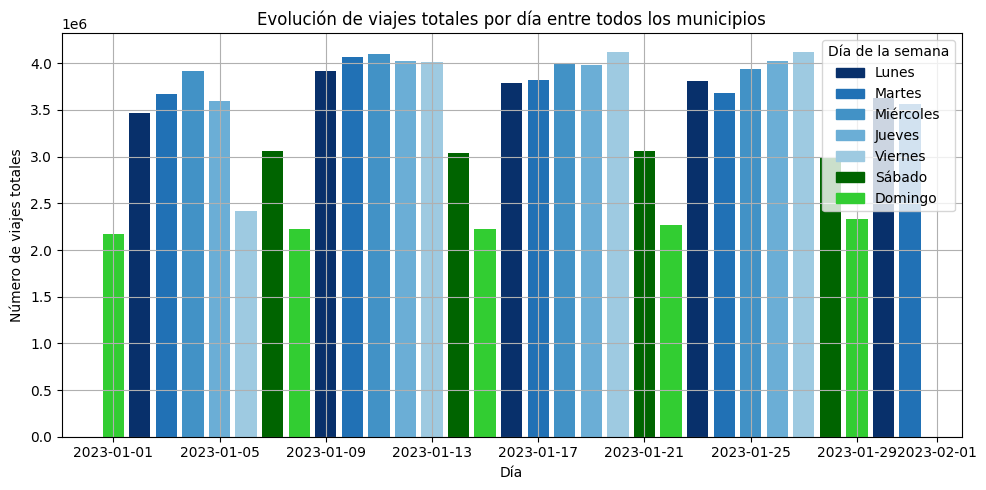

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_grouped_by_day["day"], df_grouped_by_day["viajes"], color=df_grouped_by_day["week_color"])
plt.title('Evolución de viajes totales por día entre todos los municipios')
plt.xlabel('Día')
plt.ylabel('Número de viajes totales')
plt.grid(True)
plt.tight_layout()

handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in week_color.values()]
plt.legend(handles, week_color.keys(), title="Día de la semana")

plt.show()